# Práctica 2

## Preparación de entorno

In [1]:
import numpy as np
import keras as ker
import matplotlib.pyplot as plt 

## SETUP

### Variables a definir

In [2]:
entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) # Las cuatro posibles entradas de XOR
esperadas = np.array([[0],[1],[1],[0]]) # Las cuatro posibles salidas de XOR. En este caso es necesario definirlas para para luego meterlas en el modelo MLP
nNeuronasCapaOculta = 16 # Tocar
Epoch = 500 # Tocar

def validar_neuronas_oculta(M,N,n): # Empleamos esta funcion para validar que las neuronas de la capa oculta cumplen con la regla aprendida en clase
    # La regla a validar es (M/2N < n < 2M/N)
    # Siendo M: ejemplos de entrenamiento // N: neuronas de entrada // n: neuronas de la capa oculta

    if((M/(2*N)) < n and n < ((2*M)/N)):
        return print("Neuronas de la capa oculta cumple regla") # validamos
    return print("Neuronas de la capa oculta no cumple regla")

validar_neuronas_oculta(4,2,nNeuronasCapaOculta)

Neuronas de la capa oculta no cumple regla


### Creación y ajuste de la red

In [3]:
# En este caso se nos pide realizar un modelo fully connected y secuencial. La API Keras no proporciona una clase concoida como Sequential()
# De esta manera podemos crear un modelo secuencial que automaticamente esta fully connected.
# Para crear este modelo tenemos que ir agregando capas, stackeandolas.

MLP = ker.Sequential() # Creamos el modelo vacío
# Añadimos una capa (tecnicamente dos, la de entrada (con la variable input_dim) y la oculta)
MLP.add(ker.layers.Dense(nNeuronasCapaOculta, input_dim = 2, activation='relu'))
# Añadimos la capa de salida, con una única neurona. EN este caso el input no hace falta porque ya asume que son las neuronas de capa oculta, ya
# que las capas se stackean
MLP.add(ker.layers.Dense(1,activation='sigmoid')) 

# Por último tenemos que configurar el modelo antes de entrenarlo con lo dicho en el enunciado
# Optimizador: Adam
# Función error: Mean Squared Error
# Metricas = Binary accuracy porque nos da el número de precisión de la red
MLP.compile(optimizer='adam',loss='mean_squared_error',metrics=["binary_accuracy"])


2022-03-08 19:06:32.101187: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-08 19:06:32.101658: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-08 19:06:32.109398: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Entrenamiento de la red

In [4]:
# Por último entrenamos la red con el epoch (nº iteraciones)
output_fit = MLP.fit(entradas,esperadas,epochs=Epoch,verbose = 0) 

2022-03-08 19:06:32.336018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-08 19:06:32.355480: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


### Calidad de la red

dict_keys(['loss', 'binary_accuracy'])


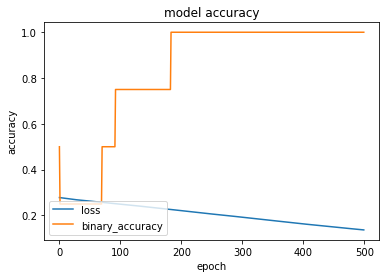

In [5]:
print(output_fit.history.keys())
# Pintamos las tanto la loss como la accuracy
plt.plot(output_fit.history['loss'])
plt.plot(output_fit.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Error', 'Exactitud'], loc='lower left')
plt.show()

### Prueba de la red

In [6]:
# Una vez tenemos entrenada la red, probamos todas las entradas y vemos si funciona
i = 0
resultados = MLP.predict(entradas).round()
print("================ VALORES XOR ================")
for entrada in entradas:
    print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] ^ entrada[1]) ," OBTENIDO ->", resultados[i])
    i += 1

================ VALORES XOR ================
ENTRADA -> [0 0]  EXPECTED -> 0  OBTENIDO -> [0.]
ENTRADA -> [0 1]  EXPECTED -> 1  OBTENIDO -> [1.]
ENTRADA -> [1 0]  EXPECTED -> 1  OBTENIDO -> [1.]
ENTRADA -> [1 1]  EXPECTED -> 0  OBTENIDO -> [0.]
